In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Train Data

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Test Data

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

matplotlib 사용해서 확인해보기

In [9]:
import matplotlib.pyplot as plt

digit = train_images[0]

# plt.imshow(digit, cmap=plt.cm.binary)
# plt.show()

print("label: ", train_labels[0])

label:  5


작업 순서는 다음과 같습니다. 먼저 훈련 데이터 train_images와 train_labels를 네트워크에 주입합니다. 그러면 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습됩니다. 마지막으로 test_images에 대한 예측을 네트워크에게 요청합니다. 그리고 이 예측이 test_labels와 맞는지 확인할 것입니다.

신경망을 만들어 보겠습니다. 여기에서도 다음 코드를 완전히 이해하지 않아도 괜찮습니다.

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,) ))
network.add(layers.Dense(10, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


compile stage

In [11]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

value scaling

In [12]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

ready to categorical value (label)

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

training

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.2574 - acc: 0.9251
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1032 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0671 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0490 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.0367 - acc: 0.9889


evaluation

In [15]:
train_loss, train_acc = network.evaluate(train_images, train_labels)
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('train_acc : ', train_acc)
print('test_acc : ', test_acc)
print('generalization error : ', train_acc - test_acc)

10000/10000 [==============================] - 0s 19us/step
train_acc :  0.9925333333333334
test_acc :  0.9794
generalization error :  0.01313333333333333


2.2

스칼라 (0D 텐서)

In [16]:
import numpy as np
x = np.array(12)
print(x)
print(x.ndim)

12
0


벡터 (1D 텐서)

In [17]:
x = np.array([12,3,6,14,7])
print(x)
print(x.ndim)

[12  3  6 14  7]
1


행렬 (2D 텐서)

In [18]:
x = np.array([
    [1,2,3,4,5],
    [6,7,8,9,10],
    [11,12,13,14,15]
])
print(x)
print(x.ndim)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
2


3D텐서와 고차원텐서

In [19]:
x = np.array(
    [
        [
            [1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15]
        ],
        [
            [1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15]
        ]
    ]
)
print(x)
print(x.ndim)

[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]
  [11 12 13 14 15]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]
  [11 12 13 14 15]]]
3


In [20]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

train_images.dtype


3
(60000, 28, 28)
uint8


dtype('uint8')

matplot lib 사용하기

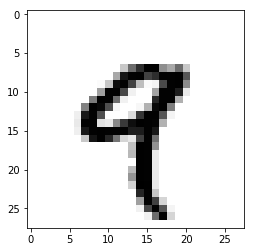

In [21]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

slicing

In [22]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [23]:
my_slice = train_images[10:100, :, :]  # 우측 식과 동일 my_slice = train_images[10:100] 
print(my_slice.shape)

(90, 28, 28)


In [24]:
my_slice = train_images[10:100, :28, :28]  # 우측 식과 동일 my_slice = train_images[10:100] 
print(my_slice.shape)

(90, 28, 28)


(60000, 14, 14)


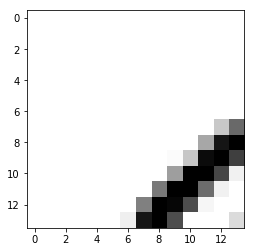

In [34]:
my_slice = train_images[:, :14, :14]
print(my_slice.shape)

digit = my_slice[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

(60000, 14, 14)


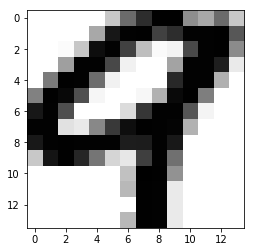

In [35]:
my_slice = train_images[:,7:-7, 7:-7]
print(my_slice.shape)

digit = my_slice[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

apply batch

In [40]:
batch = train_images[:128]
print(batch.shape)

#next batch
batch = train_images[128:256]
print(batch.shape)

# n-th batch


(128, 28, 28)
(128, 28, 28)
